In [5]:
import pandas as pd # 데이터를 불러오고 핸들링 시 필요한 패키지
import numpy as np  # 데이터 핸들링 시 필요한 패키지
import matplotlib.pyplot as plt # plt를 이용해 화면에 그림을 생성하는 패키지
import matplotlib               # 한글 font를 갖고오기 위해 사용

font_name = matplotlib.font_manager.FontProperties \
            (fname='C:/Windows/Fonts/malgun.ttf').get_name()
# 한글폰트(맑은고딕)를 갖고오는 부분    

matplotlib.rc('font', family=font_name)
# 한글폰트를 사용

%matplotlib inline
# 그림을 Ipython notebook내에 생성해주는 코드

### pickle 형태의 데이터를 불러옴

In [6]:
data=pd.read_pickle('data.pickle') 
# pandas 패키지의 read_pickle를 사용하여 데이터 로드
# pickle은 데이터를 쉽게 보관할 수 있는 저장 패키지

print("데이터의 총 수:", len(data))
# 데이터의 총 길이를 표현

data.tail()
# 데이터의 끝에 5줄을 표현

데이터의 총 수: 5461


,Location,Date,SO2,CO,O3,NO2,PM10,PM25
5456,충북,2015-12-27,0.006,0.547,0.018,0.018,43.454,26.738
5457,충북,2015-12-28,0.005,0.568,0.012,0.025,36.038,21.360
5458,충북,2015-12-29,0.006,0.845,0.007,0.032,56.063,33.824
5459,충북,2015-12-30,0.006,0.862,0.006,0.031,64.832,42.903
5460,충북,2015-12-31,0.006,0.895,0.009,0.030,64.295,53.211


### 서울지역에 한정하여 데이터 전처리

In [7]:
data_seoul=data[data.Location.isin(['서울'])]
# DataFrame의 Location행렬에서 서울에 해당하는 데이터만 가져옴

data_seoul=data_seoul.set_index(['Date'])
# 해당 인덱스를 Date로 설정하여 출력함

data_seoul.tail()

,Location,SO2,CO,O3,NO2,PM10,PM25
Date,,,,,,,
2015-12-27,서울,0.005,0.433,0.019,0.019,29.940,16.030
2015-12-28,서울,0.005,0.507,0.015,0.027,27.810,14.918
2015-12-29,서울,0.007,0.984,0.004,0.052,57.145,31.710
2015-12-30,서울,0.006,0.826,0.004,0.050,59.556,34.951
2015-12-31,서울,0.006,0.845,0.007,0.042,63.472,42.773


### 서울 지역의 미세먼지 시계열데이터를 시각화

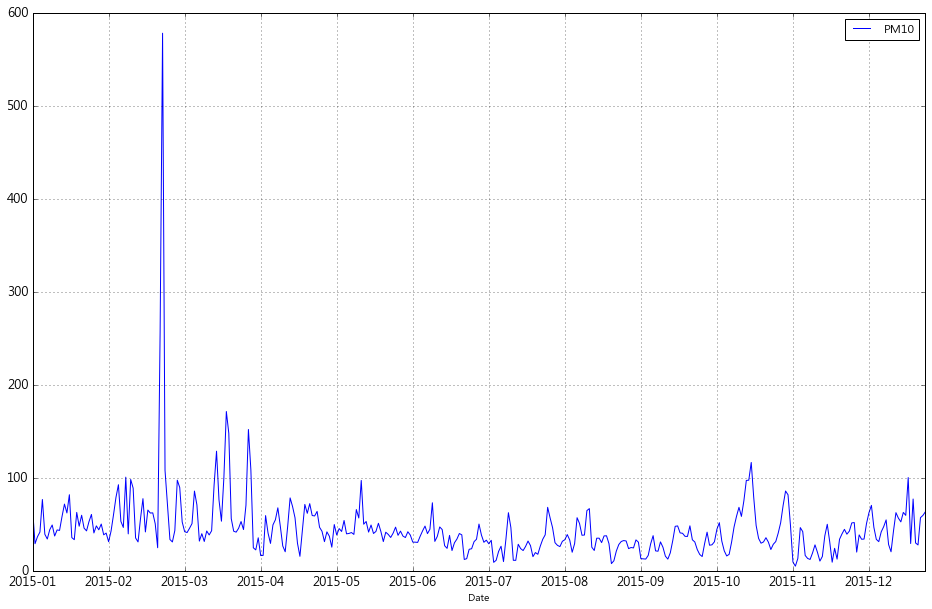

In [11]:
ax=data_seoul.PM10.plot(figsize=(16,10), legend=True, grid=True)
# 서울의 미세먼지에 관한 데이터만 ax를 이용해 시각화
# grid는 얇은 선을 나타내는 표현이며, legend는 범례를 표시

ax.tick_params(labelsize=13)
# ax그래프의 글씨 크기(label)를 조절 

ax.set_xticks(np.arange(0,len(data_seoul),31))
# ax그래프의 x범위를 설정

date_range = pd.date_range('2015-01','2016-01', freq='M')
# date_range함수를 이용해 data_seoul의 범위인 2015년 1월~2015년 12월까지의 데이터를 구함

date_range = date_range.map(lambda t: t.strftime('%Y-%m'))
# date_range를 lambda를 이용해 일시적인 함수를 생성하여 문자열 형태로 표현

ax.set_xticklabels(date_range)
# 문자열 형태로 표현한 date_range를 x축에 적용

### 30일 이동평균법을 이용한 미세먼지 시각화 분석

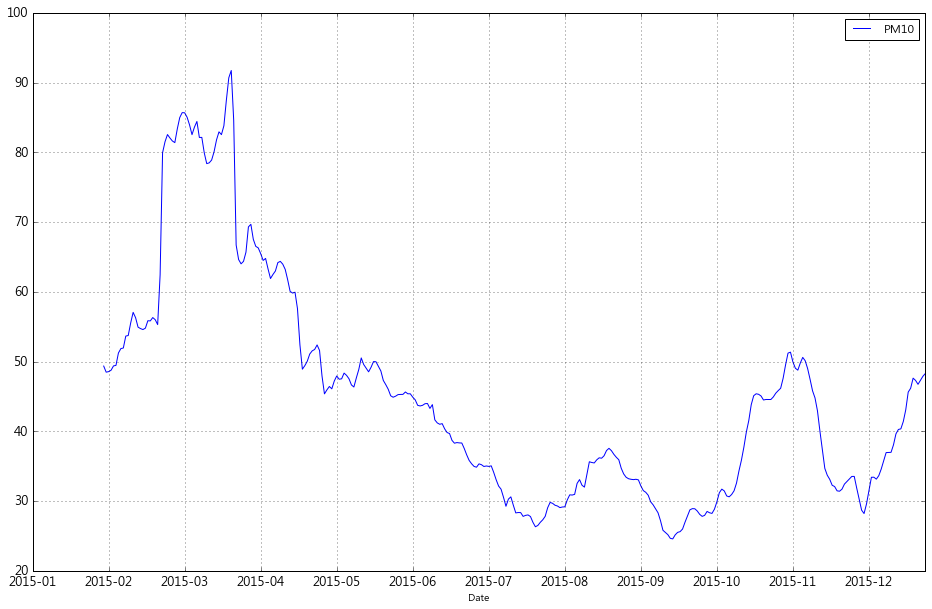

In [14]:
data_seoul_MA=pd.rolling_mean(data_seoul.PM10, 30) 
# pd.rolling_mean(표현할 데이터칼럼, N 이동평균값), MA(Moving Average)
# 이동평균법을 적용한 내용을 Plot을 통해 표현

ax=data_seoul_MA.plot(figsize=(16,10), grid=True, legend=True)

ax.tick_params(labelsize=13)
# ax그래프의 글씨 크기(label)를 조절 

ax.set_xticks(np.arange(0,len(data_seoul),31))
# ax그래프의 x범위를 설정

date_range = pd.date_range('2015-01','2016-01', freq='M')
# date_range함수를 이용해 data_seoul의 범위인 2015년 1월~2015년 12월까지의 데이터를 구함

date_range = date_range.map(lambda t: t.strftime('%Y-%m'))
# date_range를 lambda를 이용해 일시적인 함수를 생성하여 문자열 형태로 표현

ax.set_xticklabels(date_range)
# 문자열 형태로 표현한 date_range를 x축에 적용

### 히스토그램 시각화

In [15]:
data_hist=pd.DataFrame(data, columns=['Location','Date','PM10'])
# 히스토그램을 만들기 위해 지역과 날짜, 미세먼지 데이터만 새로 DataFrame을 구성
data_hist.tail()

,Location,Date,PM10
5456,충북,2015-12-27,43.454
5457,충북,2015-12-28,36.038
5458,충북,2015-12-29,56.063
5459,충북,2015-12-30,64.832
5460,충북,2015-12-31,64.295


In [17]:
data_hist=data_hist.groupby(['Date'])['PM10'].mean()
# Location을 제외하여 전국의 미세먼지 평균을 구하는 부분
# 새로 구성한 DataFrame을 Date를 기준으로 GroupBy를 실행하고
# 미세먼지에 대해 평균을 계산함

data_hist=data_hist.reset_index()
# reset_index를 통해 Date를 다시 Column형식으로 변형함

data_hist['Year']=data_hist.Date.str[0:4]
# 년도에 해당하는 부분만 빼냄

data_hist['Day']=data_hist.Date.str[5:]
# 나머지 부분은 Day로 Column을 구성

data_hist.tail()

,Date,PM10,Year,Day
360,2015-12-27,48.722562,2015,12-27
361,2015-12-28,30.520875,2015,12-28
362,2015-12-29,48.743437,2015,12-29
363,2015-12-30,57.674500,2015,12-30
364,2015-12-31,63.270062,2015,12-31


In [18]:
total_data=data_hist.pivot(index='Day',columns='Year', values='PM10')
# data_hist를 pivot형태로 만들되 index는 Day로 지정하고 각 년도에 따른 미세먼지 값만 표현

total_data=total_data.round(2)
# 평균을 구할 시 소수점자리수가 많으므로 소수점 2자리수로 한정

total_data.tail()

,2015
Day,
12-27,48.72
12-28,30.52
12-29,48.74
12-30,57.67
12-31,63.27


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A798710>]], dtype=object)

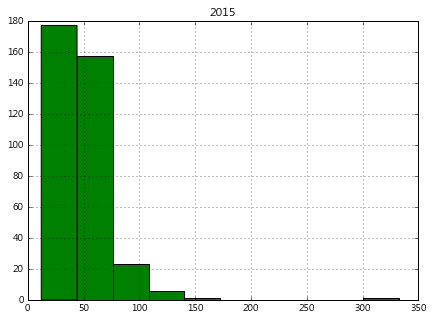

In [11]:
total_data.hist(figsize=(7,5), color='green')
# 히스토그램을 이용해 데이터를 표현

In [21]:
data_temp = data
# 계절별 데이터를 작업하기 위해 data를 data_temp라는 것으로 변형
data_temp=data_temp[data_temp.Location.isin(['서울'])]
# data_temp의 지역 중 서울에 해당하는 내용만 사용하는 코드

data_temp=data_temp.sort_values(['Date'], ascending=[True])
# Date를 정렬하는 코드

data_temp.tail()

,Location,Date,SO2,CO,O3,NO2,PM10,PM25
4818,서울,2015-12-27,0.005,0.433,0.019,0.019,29.940,16.030
4819,서울,2015-12-28,0.005,0.507,0.015,0.027,27.810,14.918
4820,서울,2015-12-29,0.007,0.984,0.004,0.052,57.145,31.710
4821,서울,2015-12-30,0.006,0.826,0.004,0.050,59.556,34.951
4822,서울,2015-12-31,0.006,0.845,0.007,0.042,63.472,42.773


In [23]:
data_temp=pd.DataFrame(data_temp,columns=['Location','Date','PM10'])
# 서울 지역의 미세먼지 데이터를 이용하므로 나머지 지역, 날짜, 미세먼지 데이터만 사용

date_dict = {"01":"겨울","02":"겨울","03":"봄", "04":"봄", "05":"봄", "06":"여름", "07":"여름", "08":"여름",\
             "09":"가을","10":"가을","11":"가을","12":"겨울"}
# 각 월별로 계절을 mapping하기 위해 date_dict를 생성

data_temp['Season']=data_temp.Date.str[5:7].map(date_dict)
# date_dict를 이용해 각 월별에 따라 계절을 표현함

data_temp['Year']=data_temp.Date.str[0:4]
# 각 년별로 표현하기 위해 Year의 데이터를 생성

Season=pd.DataFrame(data_temp.groupby(['Year','Season'], sort=False)['PM10'].mean().unstack("Year"))
# 년과 계절로 Groupby를 통해 미세먼지 값의 평균을 구함
# 이 때, Year의 값은 groupby를 사용하지 않음

Season.round(2).tail()

,2015
Season,
겨울,59.82
봄,53.80
여름,32.89
가을,35.35


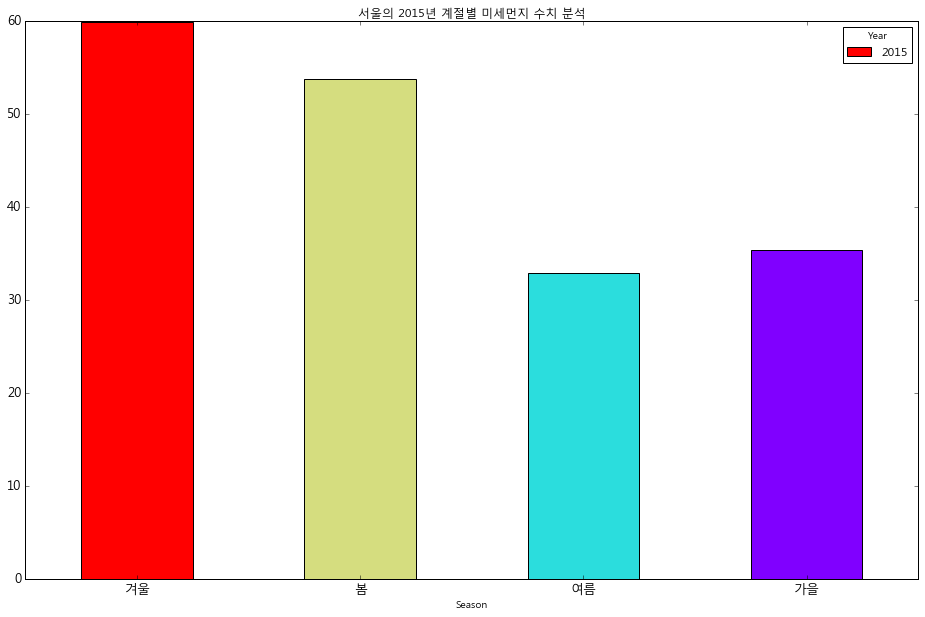

In [27]:
fig = plt.figure(figsize=(7,4))
# plt를 사용해서 Plotting할 범위를 설정

ax=fig.add_subplot(111)
colors = plt.cm.rainbow_r(np.linspace(0,1,4))
# plt의 cm계열 내 무지개 색을 이용

Season.plot(kind='bar', figsize=(16,10), title="서울의 2015년 계절별 미세먼지 수치 분석", fontsize=13, color=colors , ax=ax, rot=0)
# ax의 위치에 plot을 그림

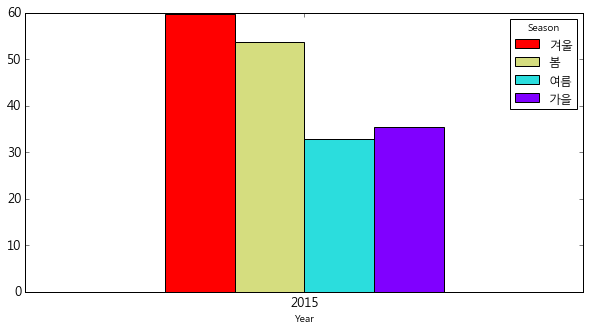

In [28]:
Season.T.plot(kind='bar', figsize=(10,5), color=colors, fontsize=13, rot=0)
# X와 Y축을 변형하여 년별에 따른 계절별 시각화